<h3>Matrix chain  multiplication</h3>
Este algoritmo tiene la finalidad de encontrar la manera óptima de realizar una serie de multiplicaciones de matrices, esto quiere decir que regresa el orden con el cual se deben realizar las multiplicaciones para realizar la menor cantidad de operaciones posibles, lo cual se traduce en menos tiempo de ejecución.
<br>
La idea detrás de este algoritmo es usar Programación Dinámica, esto se debe a que la solución correcta (y por lo tanto óptima) depende de el problema y los datos que nos estén dando, es decir, al solucionarse con un algoritmo greedy no se puede garantizar la optimalidad.


<h3>Función que construye las matrices auxiliares m y s</h3>
El funcionamiento de este primer algoritmo se basa en el arreglo p, el cual se compone por todos los tamaños de matriz que tenemos en nuestro arreglo A de matrices.<br>
Ejemplo:<br>
<img src="https://github.com/GenaroGA/AnalisisAlgoritmos/blob/main/img/arreglo_p.JPG?raw=true" alt="Arreglo p" /><br>
En este caso el arreglo p = <30, 35, 15, 5, 10, 20, 25><br>

El pseudo código que utilizaremos como referencia es:
<br>
<img src="https://github.com/GenaroGA/AnalisisAlgoritmos/blob/main/img/pseudo_ms.JPG?raw=true" alt="Pseudocodigo Matrix Chain Order" />

In [18]:
#import numpy as np
def chainMultiplication (p):
    #Longitud del arreglo p - 1
    n = len(p)-1
    #Crear la matriz m, la de costos
    m = []
    for i in range(n):
        m.append([])
        for j in range(n): 
            m[i].append([])
    #Esta es la matriz s, la de los paréntesis
    s = []
    for i in range(n):
        s.append([])
        #El tamaño de esta matriz se hizo con el fin de respetar los índices del Cormen, se explica en NOTA 1
        for j in range(n+1): 
            s[i].append([])
    #LLenar de 0 en la diagonal la matriz m (la parte de abajo de la pirámide)
    for i in range(1, n+1):
        m[i-1][i-1] = 0
        s[i-1][i-1] = 0
    for l in range(2, n+1):
        for i in range(1, n-l+2):
            j = i+l-1
            #Primer costo, para que depues empiecen a quedar los más chicos (centinela)
            m[i-1][j-1] = 1000000
            t = i
            for k in range(t, j):
                #Calcular el costo
                q = m[i-1][k-1] + m[k][j-1]+ p[i-1]*p[k]*p[j]
                #Si el costo más pequeño
                if q < m[i-1][j-1]:
                    #Se almacena el costo en la matriz m
                    m[i-1][j-1] = q
                    #y también se almacena el lugar donde va el parentesis en la matriz s
                    s[i-1][j] = k
    #print("Matriz m:")
    #print(m)
    #print("Matriz s:")
    #print(s)
    return s

<h5>NOTA 1:</h5>
En la matriz s se están agregando columnas adicionales para mantener los índices del pseudo código ya que la matriz s se "empieza" en 2 y se ve de la siguiente manera.
<br>
<img src="https://github.com/GenaroGA/AnalisisAlgoritmos/blob/main/img/matriz_s.JPG?raw=true" alt="Matriz s" />

<h3>Función que nos devuelve el orden óptimo de los paréntesis</h3>
El Algoritmo que se usó como referencia es el siguiente:
<br>
<img src="https://github.com/GenaroGA/AnalisisAlgoritmos/blob/main/img/pseudo_par.JPG?raw=true" alt="Pseaudocódigo Paréntesis" />

In [14]:
def parentesisOptimos(s, i, j):
    if i == j:
    #Este es el caso base de la recursión
        print("A_"+ str(i), end = " ")
    else:
        print("(", end = " ")
        #Aquí la recursión se hace para lo anterior al parentesis
        parentesisOptimos(s, i, s[i-1][j])
        #Aquí la recursión se hace para lo posterior al parentesis
        parentesisOptimos(s, s[i-1][j]+1, j)
        print(")", end = " ")


Prueba de funcionamiento de ambas funciones con el ejemplo del Cormen

In [42]:
#declaramos el arreglo p
p=[30,35,15,5,10,20,25]
#obtenemos las matrices m y s
x = chainMultiplication(p)
# con la segunda función imprimimos los parétesis en el orden correcto
print("Orden óptimo de los paréntesis: ")
y = parentesisOptimos(x, 1, len(p)-1)


Orden óptimo de los paréntesis: 
( ( A_1 ( A_2 A_3 ) ) ( ( A_4 A_5 ) A_6 ) ) 

<h3>Verificación de los algoritmos</h3>
<h4>Chain Multiplication:</h4>
<br>
<b>Loop invariante:</b> Los ciclos for que realemnte afectan el funcionamiento empiezan en la línea 5 del pseudocódigo, antes de eso solo se crean 2 matrices, el primer ciclo for (línea 5) empieza en 2 y siempre termina en n iteraciones, dependiendo de la longitud del arreglo p y posteroirmente los siguientes ciclos for dependen de el primero.<br>
<b>Incicialicazión:</b> El mínimo caso posible serían 2 matrices (se necesitan mínimo 2 para realizar una multiplicación) para ese caso se entra una sola vez a los cilcos y funciona:<br>
Primer ciclo for:<br>
<b>l = 2</b><br>
<b>n = 2</b><br>

Segundo ciclo for:<br>
<b>i = 1</b><br>
<b>n - l + 1 = 1</b><br>

Tercer ciclo for:<br>
<b>k = 1</b><br>
j = 1 + 2 - 1 = 2<br>
<b>j - 1 = 1</b><br>

<b>Matenimiento:</b> Por cada iteración del ciclo for de la línea 5 se están llenando los datos de una línea de las matrices auxiliares y los otros dos for se van ajustando a las dimensiones de la línea de matriz donde nos encontramos<br>

<b>Finalización:</b> El algortimo termina cuando l == n y regresa la matriz s (de paréntesis)<br>

<h4>paretesisOptimos (recursivo):</h4>
<br>
En la primera línea hay un if, el cual es el caso base cuando sólo hay 1 elemento.<br>
En el else nos encontramos la recursión (2 casos):<br>
parentesisOptimos(s, i, s[i-1][j])<br>
En el primer caso se volverá a ejecutar el algoritmo pero para los elementos en el rango (1, s[i-1][j]) por lo que mínimo será 1 elemento menos, es del inicio a el primer paréntesis que encuentre, antes había menos paréntesis por eso reduce de manera obligatoria.<br>
parentesisOptimos(s, s[i-1][j]+1, j)<br>
En el segundo caso se volverá a ejecutar el algoritmo pero para los elementos en el rango (s[i-1][j], j) por lo que mínimo será 1 elemento menos, es desde el primer paréntesis que encuentre hasta final del paréntesis, antes había menos paréntesis por eso reduce de manera obligatoria.<br>

Como ambos reducen su tamaño en cada ejecución siempre se va a llegar al caso base i==j.

<h3>Tiempo de ejecución</h3>

En la función Chain Multiplication por los 3 for anidados tendríamos un timpo de ejecución cúbico (n^3), la ventaja de estar resolviendo el problema con programación diámica es que esta función debe ejecutarse una sola vez para calcular la matrices auxiliares.

Y una vez que tenemos la matrices auxiliares construídas, podemos ejecutar la segunda función paretesisOptimos, la cual, después de resolver la recursión nos queda: <p>&Omega; (2^n)</p>

<h3>Experimentación con el tiempo de ejecución</h3>
Vamor a realizar 15 ejecuciones del algoritmo recursivo (parentesisOptimos) con diferentes tamaños de arreglo p y graficaremos sus tiempos de ejecución.

In [40]:
from timeit import default_timer
import random

p = []
#en este ciclo for se define el tamaño del arreglo p
for i in range(0, 450):
  n = random.randint(1,50)
  p.append(n)
#print(p)
inicio = default_timer()
x = chainMultiplication(p)
print("Orden óptimo de los paréntesis: ")
y = parentesisOptimos(x, 1, len(p)-1)
fin = default_timer()
print("")
print(str(i+1) + ' elementos: ' + str(fin-inicio))

Orden óptimo de los paréntesis: 
( ( A_1 ( A_2 ( A_3 ( A_4 ( A_5 ( A_6 ( A_7 ( A_8 ( A_9 ( A_10 ( A_11 ( A_12 ( A_13 ( A_14 ( A_15 ( A_16 ( A_17 ( A_18 ( A_19 ( A_20 ( A_21 ( ( A_22 ( A_23 ( A_24 ( A_25 ( A_26 ( A_27 ( A_28 ( A_29 ( A_30 ( A_31 ( A_32 ( A_33 ( A_34 ( A_35 A_36 ) ) ) ) ) ) ) ) ) ) ) ) ) ) ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( ( A_37 A_38 ) A_39 ) A_40 ) A_41 ) A_42 ) A_43 ) A_44 ) A_45 ) A_46 ) A_47 ) A_48 ) A_49 ) A_50 ) A_51 ) A_52 ) A_53 ) A_54 ) ( A_55 ( A_56 ( A_57 ( A_58 ( A_59 ( A_60 ( A_61 ( A_62 ( A_63 ( A_64 ( A_65 ( A_66 ( A_67 ( A_68 ( A_69 ( A_70 ( A_71 ( A_72 ( A_73 ( A_74 ( A_75 ( A_76 A_77 ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ( ( ( A_78 A_79 ) A_80 ) ( ( ( ( ( ( ( ( ( ( ( ( ( ( A_81 A_82 ) A_83 ) A_84 ) A_85 ) A_86 ) A_87 ) A_88 ) A_89 ) A_90 ) A_91 ) A_92 ) A_93 ) ( A_94 ( A_95 ( A_96 ( A_97 ( A_98 ( A_99 ( A_100 ( A_101 ( A_102 ( A_103 ( A_104 ( A_105 ( A_106 ( A_107 ( A_108 ( A_109 ( A_110 ( A_111 ( A_112 ( A_113 ( A_114 ( A_115 ( A_116 ( A_117

Text(0, 0.5, 'Segundos')

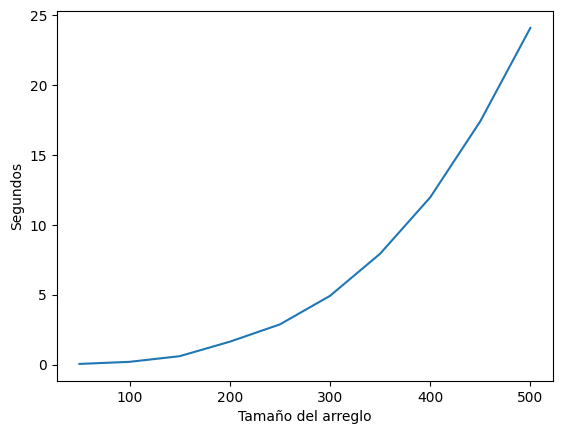

In [50]:
import matplotlib.pyplot as plt

elementos = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
tiempos = [0.0470049000000472, 0.196574199999759, 0.6000440000002527, 1.6370457999996688, 2.8739112999996905, 4.915760800000044, 7.928668500000185,11.961814400000094, 17.407085599999846, 24.092559400000027]

plt.plot(elementos, tiempos)
plt.xlabel('Tamaño del arreglo')
plt.ylabel('Segundos')